Use wine dataset and perform the following:

a) Implement Pre-processing functions

- check for NULL values in the dataset. If any NULL value is present then treat it accordingly.

- extract only feature columns from the dataset.

b) Apply Principal component analysis and extract 2 principal components from the dataset. 

c) Plot the scatter plot for the extracted components of wine dataset.

d) Now apply k-means clustering using the value of k=3 (as there are three different wine qualities in the target variable).

e) Form the clusters.

f) Evaluate the quality of clusters formed by k-means

In [8]:
#importing wine dataset
import pandas as pd 
import matplotlib.pyplot as plt 
winedf=pd.read_csv('https://raw.githubusercontent.com/kajalpanda1/DatasetRepository/master/Wine_Quality.csv') 

In [9]:
winedf.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
winedf.shape

(6497, 13)

In [10]:
#checking for NULL values
winedf.isnull().sum().sort_values(ascending=False) 

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
chlorides                2
residual sugar           2
quality                  0
alcohol                  0
density                  0
total sulfur dioxide     0
free sulfur dioxide      0
type                     0
dtype: int64

In [11]:
#treating missing values
winedf=winedf.fillna(winedf.median())
winedf.isnull().sum().sort_values(ascending=False) 

quality                 0
alcohol                 0
sulphates               0
pH                      0
density                 0
total sulfur dioxide    0
free sulfur dioxide     0
chlorides               0
residual sugar          0
citric acid             0
volatile acidity        0
fixed acidity           0
type                    0
dtype: int64

In [12]:
#extracting features from the dataset
winedf1=winedf.iloc[:,1:].values 

In [13]:
#standardizing the features
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler() 
winedf_scaled=ss.fit_transform(winedf1)

In [16]:
#applying PCA on the dataset
from sklearn.decomposition import PCA 
pca=PCA(n_components=2) 
Components=pca.fit_transform(winedf_scaled) 

In [21]:
#Getting dataframe with pca components and target column
principalDf=pd.DataFrame(data=Components,columns=['principalcomponent_1', 'principalcomponent_2']) 
finalDf=pd.concat([principalDf,winedf['quality']],axis=1) 

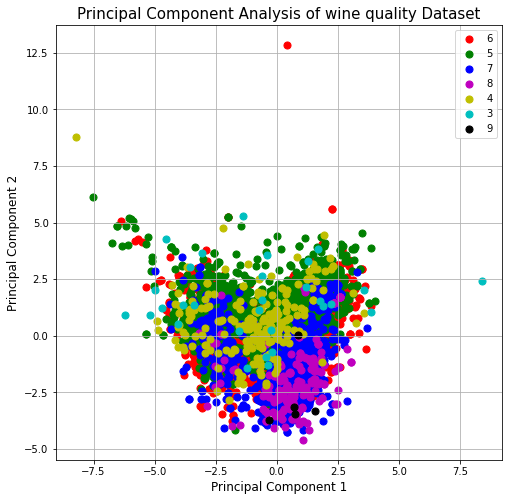

In [22]:
#plotting prinicpal components and quality column of wine dataset
fig=plt.figure(figsize=(8,8))  
ax=fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize=12) 
ax.set_ylabel('Principal Component 2',fontsize=12) 
ax.set_title("Principal Component Analysis of wine quality Dataset", fontsize=15) 
classes=[6,5,7,8,4,3,9] 
colors=['r','g','b','m','y','c','k'] 
for target,color in zip(classes,colors): 
 indices=finalDf['quality']==target 
 ax.scatter(finalDf.loc[indices,'principalcomponent_1'],finalDf.loc[indices,'principalcomponent_2'],c=color,s=50) 
ax.legend(classes) 
ax.grid() 

In [27]:
#implementing KMeans on the wine dataset
from sklearn.cluster import KMeans 
kmeans=KMeans(n_clusters=7,init='k-means++',max_iter=300,n_init=10,random_state=10) 
y_kmeans=kmeans.fit_predict(winedf_scaled) 

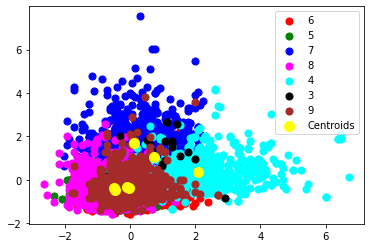

In [28]:
#visualizing the clusters formed
plt.scatter(winedf_scaled [y_kmeans==0,0], winedf_scaled [y_kmeans==0,1], s=50, c='red',  label='6') 
plt.scatter(winedf_scaled [y_kmeans==1,0], winedf_scaled [y_kmeans==1,1], s=50, c='green',  label='5') 
plt.scatter(winedf_scaled [y_kmeans==2,0], winedf_scaled [y_kmeans==2,1], s=50, c='blue',  label='7') 
plt.scatter(winedf_scaled [y_kmeans==3,0], winedf_scaled [y_kmeans==3,1], s=50, c='magenta',  label='8') 
plt.scatter(winedf_scaled [y_kmeans==4,0], winedf_scaled [y_kmeans==4,1], s=50, c='cyan',  label='4') 
plt.scatter(winedf_scaled [y_kmeans==5,0], winedf_scaled [y_kmeans==5,1], s=50, c='black',  label='3') 
plt.scatter(winedf_scaled [y_kmeans==6,0], winedf_scaled [y_kmeans==6,1], s=50, c='brown',  label='9')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,  c='yellow',label='Centroids') 
plt.legend() 

In [29]:
#evaluating clusters
kmeans.inertia_ 

39153.21681488897